In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
dataset = 'https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset'

In [4]:
od.download(dataset)

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset


100%|██████████| 219M/219M [00:12<00:00, 18.9MB/s] 


In [5]:
import numpy as np
import os

import shutil
import random as rn


In [6]:
!pip3 install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 991.0 kB/s eta 0:00:39
    --------------------------------------- 0.7/38.6 MB 9.3 MB/s eta 0:00:05
   - -------------------------------------- 1.5/38.6 MB 12.2 MB/s eta 0:00:04
   -- ------------------------------------- 2.5/38.6 MB 14.3 MB/s eta 0:00:03
   --- ------------------------------------ 3.1/38.6 MB 14.1 MB/s eta 0:00:03
   ---- ----------------------------------- 4.0/38.6 MB 14.8 MB/s eta 0:00:03
   ---- ----------------------------------- 4.7/38.6 MB 15.0 MB/s eta 0:00:03
   ----- ---------------------------------- 5.5/38.6 MB 15.3 MB/s eta 0:00:03
   ------ --------------------------------- 6.2/38.6 MB 15.8 MB/s eta 0:00:03
   ------- -------------------------------- 7.1/38.6 MB 16.3 MB/s eta 0:00:02
   -------- ------------------------------- 7.9/38.6 MB 16.3 MB/s eta 0:00:02
   -------- ------------------------------- 8.7/38.6 MB 16.3 MB/s eta 0:

In [7]:
data_dir = 'rice-image-dataset/Rice_Image_Dataset'

In [8]:
print(os.listdir(data_dir))

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag', 'Rice_Citation_Request.txt']


In [9]:
batch_size = 32
img_height = 180
img_width = 180
     

In [10]:
pip install tensorflow==2.16.1 --ignore-installed

  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.62.2-cp311-cp311-win_amd64.whl.metadata (4.2 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
botocore 1.31.64 requires urllib3<2.1,>=1.25.4; python_version >= "3.10", but you have urllib3 2.2.1 which is incompatible.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
mdit-py-plugins 0.3.0 requires markdown-it-py<3.0.0,>=1.0.0, but you have markdown-it-py 3.0.0 which is incompatible.
streamlit 1.30.0 requires packaging<24,>=16.8, but you have packaging 24.0 which is incompatible.


In [11]:
pip install --user tensorflow

Note: you may need to restart the kernel to use updated packages.


In [12]:
 import tensorflow as tf
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 75000 files belonging to 5 classes.
Using 60000 files for training.


In [13]:
import tensorflow as tf
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 75000 files belonging to 5 classes.
Using 15000 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)


['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


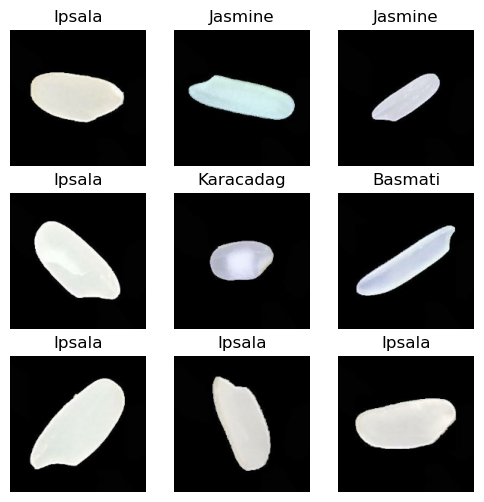

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
     

(32, 180, 180, 3)
(32,)


In [17]:
from tensorflow.keras import layers
normalization_layer = layers.Rescaling(1./255)
 

In [18]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
     

0.0 0.9843138


In [41]:
from keras.models import Sequential
num_classes = 10
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 365s 191ms/step - accuracy: 0.9201 - loss: 0.2207 - val_accuracy: 0.9885 - val_loss: 0.0359
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 357s 190ms/step - accuracy: 0.9901 - loss: 0.0321 - val_accuracy: 0.9955 - val_loss: 0.0170
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 356s 190ms/step - accuracy: 0.9914 - loss: 0.0264 - val_accuracy: 0.9939 - val_loss: 0.0199
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 348s 186ms/step - accuracy: 0.9931 - loss: 0.0213 - val_accuracy: 0.9941 - val_loss: 0.0206
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 353s 188ms/step - accuracy: 0.9952 - loss: 0.0151 - val_accuracy: 0.9961 - val_loss: 0.0153
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 353s 188ms/step - accuracy: 0.9949 - loss: 0.0160 - val_accuracy: 0.9943 - val_loss: 0.0177
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 348s 185ms/step - accuracy: 0.9966 - loss: 0.0118 - val_accuracy: 0.9851 - val_loss: 0.0486
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 353s 188ms/step - ac

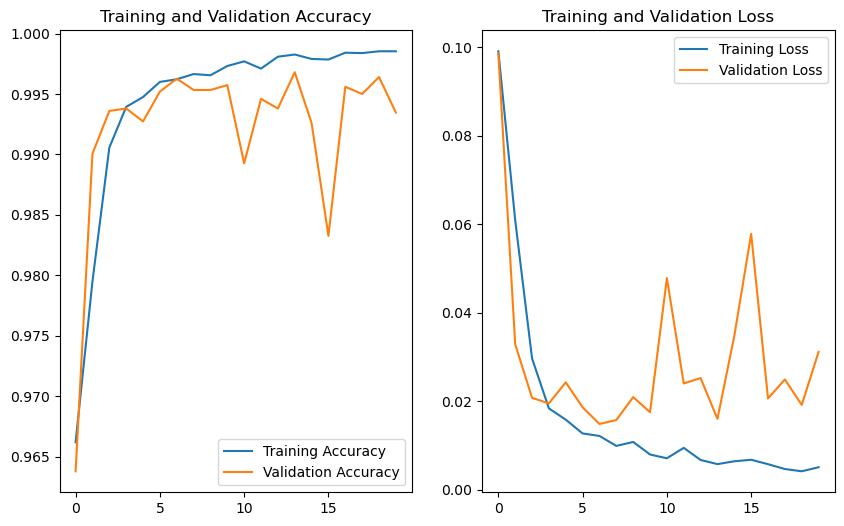

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
from keras.models import Sequential
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

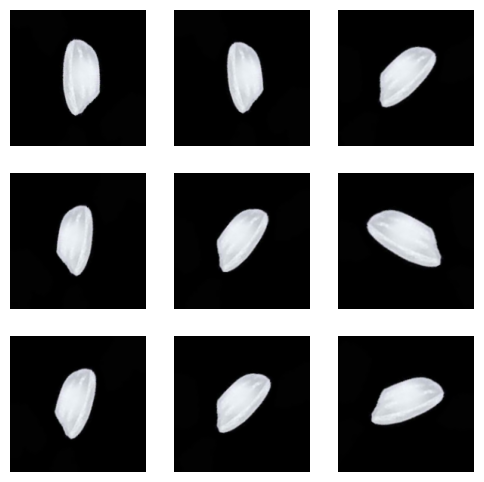

In [46]:
plt.figure(figsize=(6, 6))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [47]:
from keras.models import Sequential
num_classes = 5
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 398s 212ms/step - accuracy: 0.9632 - loss: 0.1074 - val_accuracy: 0.9638 - val_loss: 0.0986
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 406s 217ms/step - accuracy: 0.9750 - loss: 0.0740 - val_accuracy: 0.9901 - val_loss: 0.0329
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 593s 316ms/step - accuracy: 0.9892 - loss: 0.0338 - val_accuracy: 0.9936 - val_loss: 0.0208
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 474s 253ms/step - accuracy: 0.9937 - loss: 0.0183 - val_accuracy: 0.9938 - val_loss: 0.0195
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 743s 396ms/step - accuracy: 0.9946 - loss: 0.0163 - val_accuracy: 0.9927 - val_loss: 0.0242
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 408s 218ms/step - accuracy: 0.9957 - loss: 0.0140 - val_accuracy: 0.9952 - val_loss: 0.0186
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 409s 218ms/step - accuracy: 0.9960 - loss: 0.0132 - val_accuracy: 0.9963 - val_loss: 0.0148
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 413s 220ms/step - ac

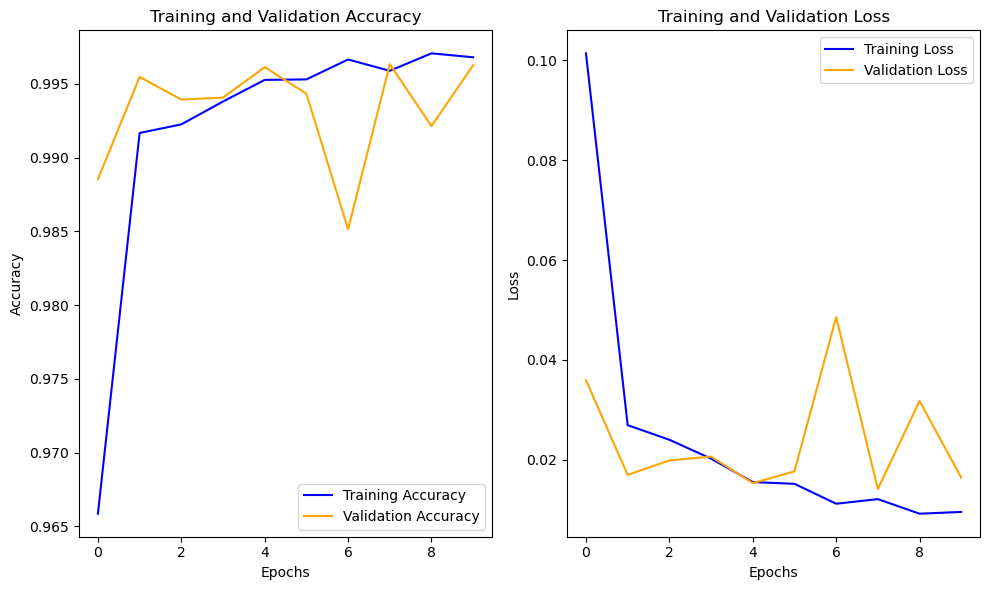

In [54]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='blue')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [56]:
#loss and accuracy of train dataset
loss,accuracy = model.evaluate(train_ds)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")     

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 113s 60ms/step - accuracy: 0.9982 - loss: 0.0049
Loss: 0.004439352545887232
Accuracy: 0.9984833598136902


In [59]:
#loss and accuracy of validation dataset
loss,accuracy = model.evaluate(val_ds)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}") 

469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9938 - loss: 0.0344
Loss: 0.03112013079226017
Accuracy: 0.9934666752815247


In [75]:
#possibile probability
y_pred_probabilities = model.predict(train_ds)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
y_pred_classes[:15]

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 106s 56ms/step


array([1, 1, 2, 1, 2, 0, 3, 0, 3, 3, 4, 3, 2, 0, 4], dtype=int64)

469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step
              precision    recall  f1-score   support

     Arborio       0.20      0.20      0.20      3053
     Basmati       0.21      0.20      0.21      3035
      Ipsala       0.19      0.19      0.19      2934
     Jasmine       0.21      0.21      0.21      3069
   Karacadag       0.19      0.19      0.19      2909

    accuracy                           0.20     15000
   macro avg       0.20      0.20      0.20     15000
weighted avg       0.20      0.20      0.20     15000



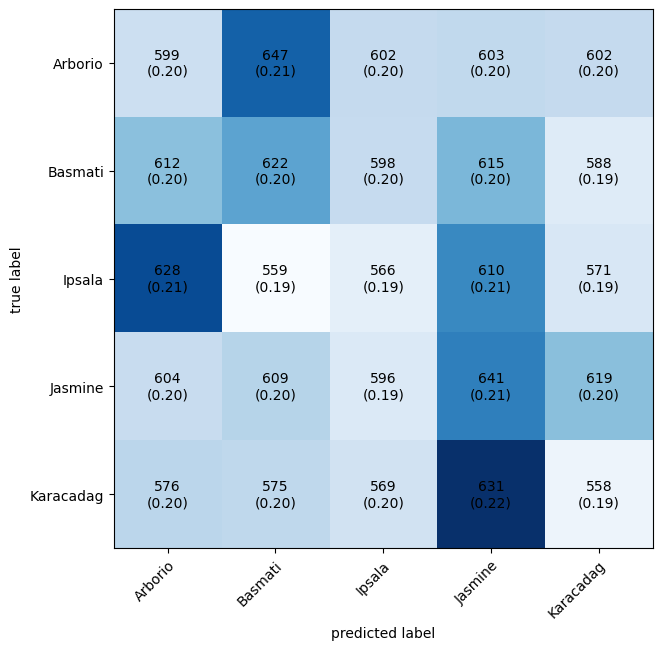

In [76]:
from sklearn.metrics import classification_report
class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']  # Replace [...] with your class names
true_labels = []
for images, labels in val_ds:
    true_labels.extend(labels.numpy())

true_labels = np.array(true_labels)
# Obtain predicted labels
y_pred_probabilities = model.predict(val_ds)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Print classification report
print(classification_report(true_labels, y_pred_classes, target_names=class_names))

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred_classes)

# Plot confusion matrix
plot_confusion_matrix(conf_mat=conf_matrix, figsize=(8, 7), class_names=class_names, show_normed=True)
plt.show()



In [80]:
print(true_labels)

[1 3 3 ... 3 2 2]


In [81]:
print(y_pred_classes)

[3 0 3 ... 2 1 4]
